In [1]:
#import needed libraaries
import seaborn as sns
color = sns.color_palette()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('fivethirtyeight')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignore warnings from sklearn and seaborn

In [2]:
# read the train and test datasets
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

# Data Exploration, Visualization and Feature Engineering

In [3]:
## the size (rows and columns)present in the dataset
print(df_train.shape)
print(df_test.shape)

(38312, 19)
(16496, 18)


In [4]:
#preview the first few rows of the dataset
df_train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [5]:
# descriptive statistics of the numeric features
df_train.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


In [6]:
#descriptive statistics of the categorical features
df_train.describe(include=[np.object, pd.Categorical])

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
count,38312,38312,36633,38312,38312,38312,38312,38312,38312,38312,38312
unique,38312,9,3,2,3,37,2,3,2,2,7
top,YAK/S/08595,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,LAGOS,Yes,Married,No,No,1
freq,1,11695,25578,26880,21310,6204,34995,31022,38161,34709,18867


In [7]:
#information about the dataset
df_train.info() # we can see that we have missing values in the Qualification's field/column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [8]:
# missing values
df_train.isnull().sum() #presence of 1679 missing values in the Qualification's field

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [9]:
#check for duplicate rows
print('Shape before removing duplicate rows:', df_train.shape)
df_train.drop_duplicates(subset='EmployeeNo', keep='last')
print('Shape after removing duplicate rows:', df_train.shape)
# meaning,we do not have duplicate rows

Shape before removing duplicate rows: (38312, 19)
Shape after removing duplicate rows: (38312, 19)


In [10]:
# create features (Age and working years) for the employees from the existing features (year_of_birth & Year_of_recruitment) 
from datetime import date
df_train['Age'] = date.today().year - df_train['Year_of_birth']
df_test['Age'] = date.today().year - df_test['Year_of_birth']
df_train['year_of_experience'] = date.today().year - df_train['Year_of_recruitment']
df_test['year_of_experience'] = date.today().year - df_test['Year_of_recruitment']
df_train['overall_performance'] = df_train['Training_score_average'] * df_train['Trainings_Attended']
df_test['overall_performance'] = df_test['Training_score_average'] * df_test['Trainings_Attended']

In [11]:
# fill categorical feature (Qualification) having missing values with the mode of the feature
df_train['Qualification'].fillna(df_train['Qualification'].mode()[0], inplace=True)
df_test['Qualification'].fillna(df_test['Qualification'].mode()[0], inplace=True)

In [12]:
def find_category_mean(df, variable, target):
    return df.groupby([variable])[target].mean().to_dict()


def integer_encode_mean(train, test, variable, ordinal_mapping):

    df_train[variable] = df_train[variable].map(ordinal_mapping)
    df_test[variable] = df_test[variable].map(ordinal_mapping)

In [13]:
def find_category_mappings(df, variable, target):

    # first  we generate an ordered list with the labels
    ordered_labels = train.groupby([variable
                                      ])[target].mean().sort_values().index

    # return the dictionary with mappings
    return {k: i for i, k in enumerate(ordered_labels, 0)}


def integer_encode(train, test, variable, ordinal_mapping):

    df_train[variable] = df_train[variable].map(ordinal_mapping)
    df_test[variable] = df_test[variable].map(ordinal_mapping)

In [14]:
## Recheck for missing values
df_train.isnull().sum()

EmployeeNo                             0
Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
State_Of_Origin                        0
Foreign_schooled                       0
Marital_Status                         0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Promoted_or_Not                        0
Age                                    0
year_of_experience                     0
overall_performance                    0
dtype: int64

In [15]:
df_train.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not', 'Age', 'year_of_experience', 'overall_performance'],
      dtype='object')

In [16]:
num_cols = ['Trainings_Attended', 'Year_of_birth', 'Last_performance_score', 'Year_of_recruitment',
           'Previous_Award', 'Training_score_average', 'Targets_met','Promoted_or_Not',
            'Age', 'year_of_experience', 'overall_performance']

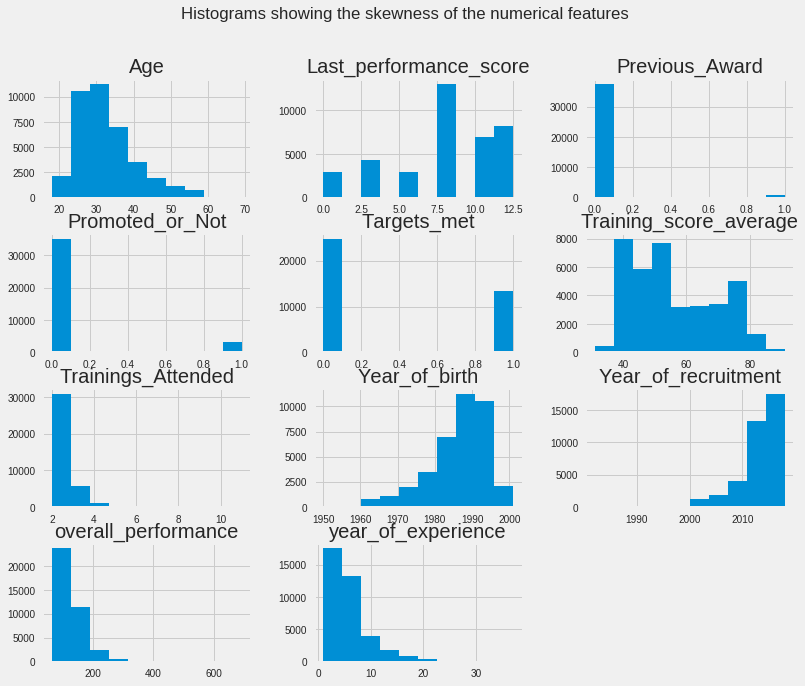

Skewness of the numerical features


Trainings_Attended        3.489129
Year_of_birth            -1.014252
Last_performance_score   -0.496383
Year_of_recruitment      -1.750977
Previous_Award            6.341895
Training_score_average    0.455572
Targets_met               0.615228
Promoted_or_Not           2.985658
Age                       1.014252
year_of_experience        1.750977
overall_performance       2.137559
dtype: float64

In [17]:
## histogram for the numerical features
df_train[num_cols].hist(figsize=(12,10), bins=10)
plt.suptitle('Histograms showing the skewness of the numerical features')
plt.show()

print('Skewness of the numerical features')
df_train[num_cols].skew() ## we can see that Previous_Award and Tranings attended are highly skewed

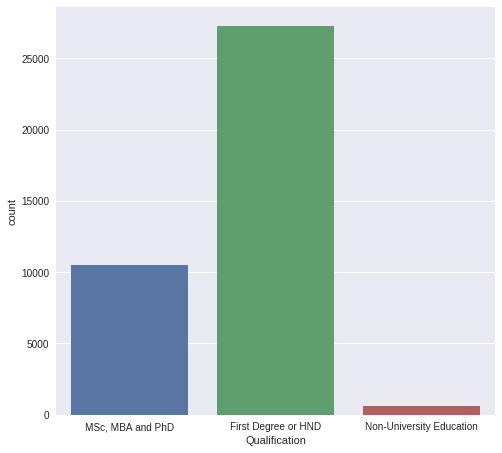

In [18]:
#analyse educational background
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x= 'Qualification', data = df_train)

In [19]:
#unique divisions in the dataset
df_train['Division'].value_counts()

Commercial Sales and Marketing                 11695
Customer Support and Field Operations           7973
Sourcing and Purchasing                         5052
Information Technology and Solution Support     4952
Information and Strategy                        3721
Business Finance Operations                     1786
People/HR Management                            1704
Regulatory and Legal services                    733
Research and Innovation                          696
Name: Division, dtype: int64

In [20]:
#Group by division and find the department having the highest number of promotion
df_train.groupby('Division')['Promoted_or_Not'].mean()

Division
Business Finance Operations                    0.081747
Commercial Sales and Marketing                 0.071911
Customer Support and Field Operations          0.088298
Information Technology and Solution Support    0.107431
Information and Strategy                       0.093523
People/HR Management                           0.056925
Regulatory and Legal services                  0.055935
Research and Innovation                        0.061782
Sourcing and Purchasing                        0.096793
Name: Promoted_or_Not, dtype: float64

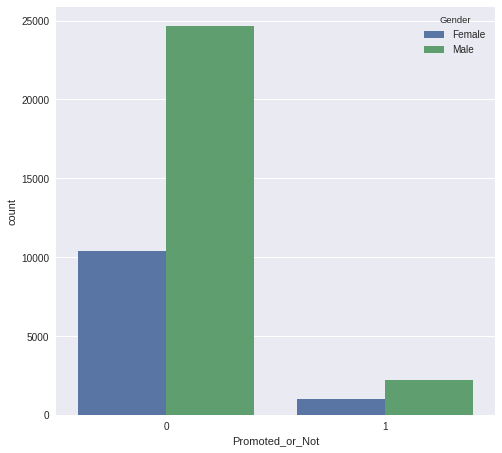

In [21]:
#promotion based on gender
sns.countplot(x='Promoted_or_Not', hue='Gender', data=df_train)

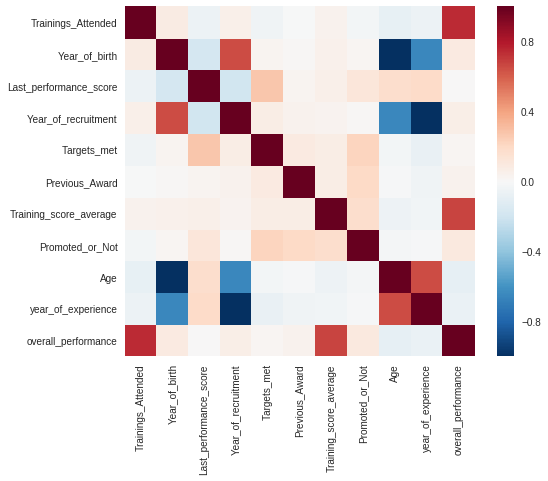

In [22]:
#Heat map, shows the correlation between two features
corrmat= df_train.corr()
f, ax =plt.subplots(figsize=(7,6))
sns.heatmap(corrmat, square=True)

In [23]:
# correlation between the features and the target variables
df_train.corr()['Promoted_or_Not']

Trainings_Attended       -0.024345
Year_of_birth             0.017991
Last_performance_score    0.119690
Year_of_recruitment       0.012287
Targets_met               0.224518
Previous_Award            0.201434
Training_score_average    0.178448
Promoted_or_Not           1.000000
Age                      -0.017991
year_of_experience       -0.012287
overall_performance       0.096033
Name: Promoted_or_Not, dtype: float64

In [24]:
## check for categories i.e. unique values from each columns
cat_col = ['Division', 'Qualification', 'Gender', 'Channel_of_Recruitment', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action', 'No_of_previous_employers',
       'Previous_IntraDepartmental_Movement']
for cat in cat_col:
    print('Number of unique {}'.format(cat),df_train[cat].nunique())

Number of unique Division 9
Number of unique Qualification 3
Number of unique Gender 2
Number of unique Channel_of_Recruitment 3
Number of unique State_Of_Origin 37
Number of unique Foreign_schooled 2
Number of unique Marital_Status 3
Number of unique Past_Disciplinary_Action 2
Number of unique No_of_previous_employers 7
Number of unique Previous_IntraDepartmental_Movement 2


In [25]:
# unique features from each category for the necessary features
unique_cat_col =  ['Division', 'Qualification', 'Gender', 'Channel_of_Recruitment', 'Foreign_schooled', 
                   'Marital_Status', 'Past_Disciplinary_Action', 'No_of_previous_employers',
                   'Previous_IntraDepartmental_Movement']
for cat in unique_cat_col:
    print(df_train[cat].unique())

['Commercial Sales and Marketing' 'Customer Support and Field Operations'
 'Information and Strategy' 'Information Technology and Solution Support'
 'Sourcing and Purchasing' 'Business Finance Operations'
 'People/HR Management' 'Research and Innovation'
 'Regulatory and Legal services']
['MSc, MBA and PhD' 'First Degree or HND' 'Non-University Education']
['Female' 'Male']
['Direct Internal process' 'Agency and others'
 'Referral and Special candidates']
['No' 'Yes']
['Married' 'Single' 'Not_Sure']
['No' 'Yes']
['0' '1' '4' '3' '2' 'More than 5' '5']
['No' 'Yes']


In [26]:
## regroup features
division = {'Commercial Sales and Marketing' :'CSS', 'Customer Support and Field Operations':'CSFO',
             'Information and Strategy':'IS', 'Information Technology and Solution Support':'ITSS',
             'Sourcing and Purchasing':'SP', 'Business Finance Operations':'BFO','People/HR Management':'PHR', 
            'Research and Innovation':'RI', 'Regulatory and Legal services':'RLS'}
qualification = {'MSc, MBA and PhD':'Graduate', 'First Degree or HND':'Graduate', 'Non-University Education':'Non-Graduate'}
marital_status = {'Married':'Married', 'Single':'others', 'Not_Sure':'others'}
no_of_previous_employers = {'0':'<=1','1':'<=1', '2':'>1', '3':'>1', '4':'>1','5':'>1', 'More than 5':'>1'}
Geopolitcal_zone = {'ANAMBRA':'South_East', 'KATSINA':'North_West', 'NIGER':'North_Central', 'AKWA IBOM':'South_South', 'ENUGU':'South_East',
        'OYO':'South_West',
       'LAGOS':'South_West', 'ONDO':'South_West', 'KWARA':'North_Central', 'EDO':'South_South', 'BAUCHI':'North_East', 
        'TARABA':'North_East', 'RIVERS':'South_South',
       'KADUNA':'North_West', 'PLATEAU':'North_Central', 'EKITI':'South_West', 'BORNO':'North_East', 'IMO':'South_East',
        'CROSS RIVER':'South_South',
       'KANO':'North_West', 'FCT':'North_Central', 'OGUN':'South_West', 'GOMBE':'North_East', 'DELTA':'South_South',
        'BENUE':'North_Central', 'ZAMFARA':'North_West',
       'OSUN':'South_West', 'ABIA':'South_East', 'KEBBI':'North_West', 'ADAMAWA':'North_East', 'NASSARAWA':'North_Central',
        'SOKOTO':'North_East', 'KOGI':'North_Central',
       'JIGAWA':'North_West', 'BAYELSA':'South_South', 'YOBE':'North_East', 'EBONYI':'South_East'}
datasets=[df_train, df_test]
for dataset in datasets:
    #dataset['No_of_previous_employers'] = dataset['No_of_previous_employers'].replace(no_of_previous_employers)
    dataset['Geopolitical_zone'] = dataset['State_Of_Origin'].replace(Geopolitcal_zone)
    dataset['Marital_Status'] = dataset['Marital_Status'].replace(marital_status)
    dataset['Division']=dataset['Division'].replace(division)
    dataset['Qualification'] = dataset['Qualification'].replace(qualification)


In [27]:
df_train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age,year_of_experience,overall_performance,Geopolitical_zone
0,YAK/S/00001,CSS,Graduate,Female,Direct Internal process,2,1986,12.5,2011,1,...,No,Married,No,No,0,0,33,8,82,South_East
1,YAK/S/00002,CSFO,Graduate,Male,Agency and others,2,1991,12.5,2015,0,...,Yes,Married,No,No,0,0,28,4,104,South_East
2,YAK/S/00003,CSS,Graduate,Male,Direct Internal process,2,1987,7.5,2012,0,...,Yes,Married,No,No,0,0,32,7,84,North_West
3,YAK/S/00004,CSS,Graduate,Male,Agency and others,3,1982,2.5,2009,0,...,Yes,others,No,No,1,0,37,10,126,North_Central
4,YAK/S/00006,IS,Graduate,Male,Direct Internal process,3,1990,7.5,2012,0,...,Yes,Married,No,No,1,0,29,7,231,South_South


Not Promoted    0.915405
Promoted        0.084595
Name: Promoted_or_Not, dtype: float64


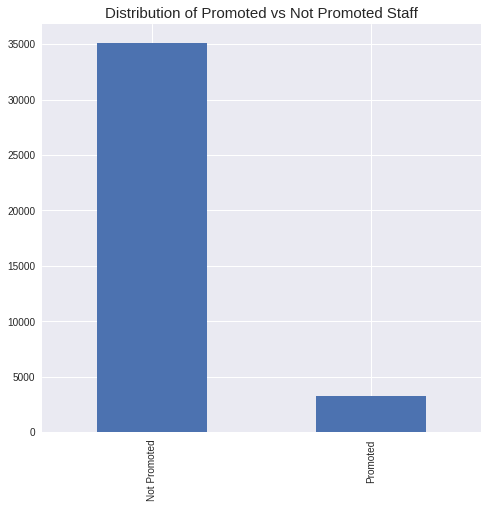

In [28]:
# check to see if the data is normally distributed
promoted_or_not = {1:'Promoted', 0:'Not Promoted'}
df_train['Promoted_or_Not']=df_train['Promoted_or_Not'].replace(promoted_or_not)

print(df_train['Promoted_or_Not'].value_counts(normalize=True))
df_train['Promoted_or_Not'].value_counts().plot(kind='bar')
plt.title('Distribution of Promoted vs Not Promoted Staff', fontsize=15)
plt.show() 

From the plot above, the data is highly imbalanced i.e. does not follow a normal distribution. We wish to have 
approximately the same number of instance i.e. almost the same number of promoted and unpromoted staff

In [29]:
#convert target variables back to integers
promoted_or_not = {'Promoted':1,'Not Promoted':0}
df_train['Promoted_or_Not']=df_train['Promoted_or_Not'].replace(promoted_or_not)

In [30]:
df_train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age,year_of_experience,overall_performance,Geopolitical_zone
0,YAK/S/00001,CSS,Graduate,Female,Direct Internal process,2,1986,12.5,2011,1,...,No,Married,No,No,0,0,33,8,82,South_East
1,YAK/S/00002,CSFO,Graduate,Male,Agency and others,2,1991,12.5,2015,0,...,Yes,Married,No,No,0,0,28,4,104,South_East
2,YAK/S/00003,CSS,Graduate,Male,Direct Internal process,2,1987,7.5,2012,0,...,Yes,Married,No,No,0,0,32,7,84,North_West
3,YAK/S/00004,CSS,Graduate,Male,Agency and others,3,1982,2.5,2009,0,...,Yes,others,No,No,1,0,37,10,126,North_Central
4,YAK/S/00006,IS,Graduate,Male,Direct Internal process,3,1990,7.5,2012,0,...,Yes,Married,No,No,1,0,29,7,231,South_South


In [31]:
# Relationship between the categorical features and the target variables
cat_cols_low_card = ['Division', 'Qualification', 'Gender', 'Channel_of_Recruitment',
                   'Previous_Award', 'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
                   'Previous_IntraDepartmental_Movement', 'No_of_previous_employers']

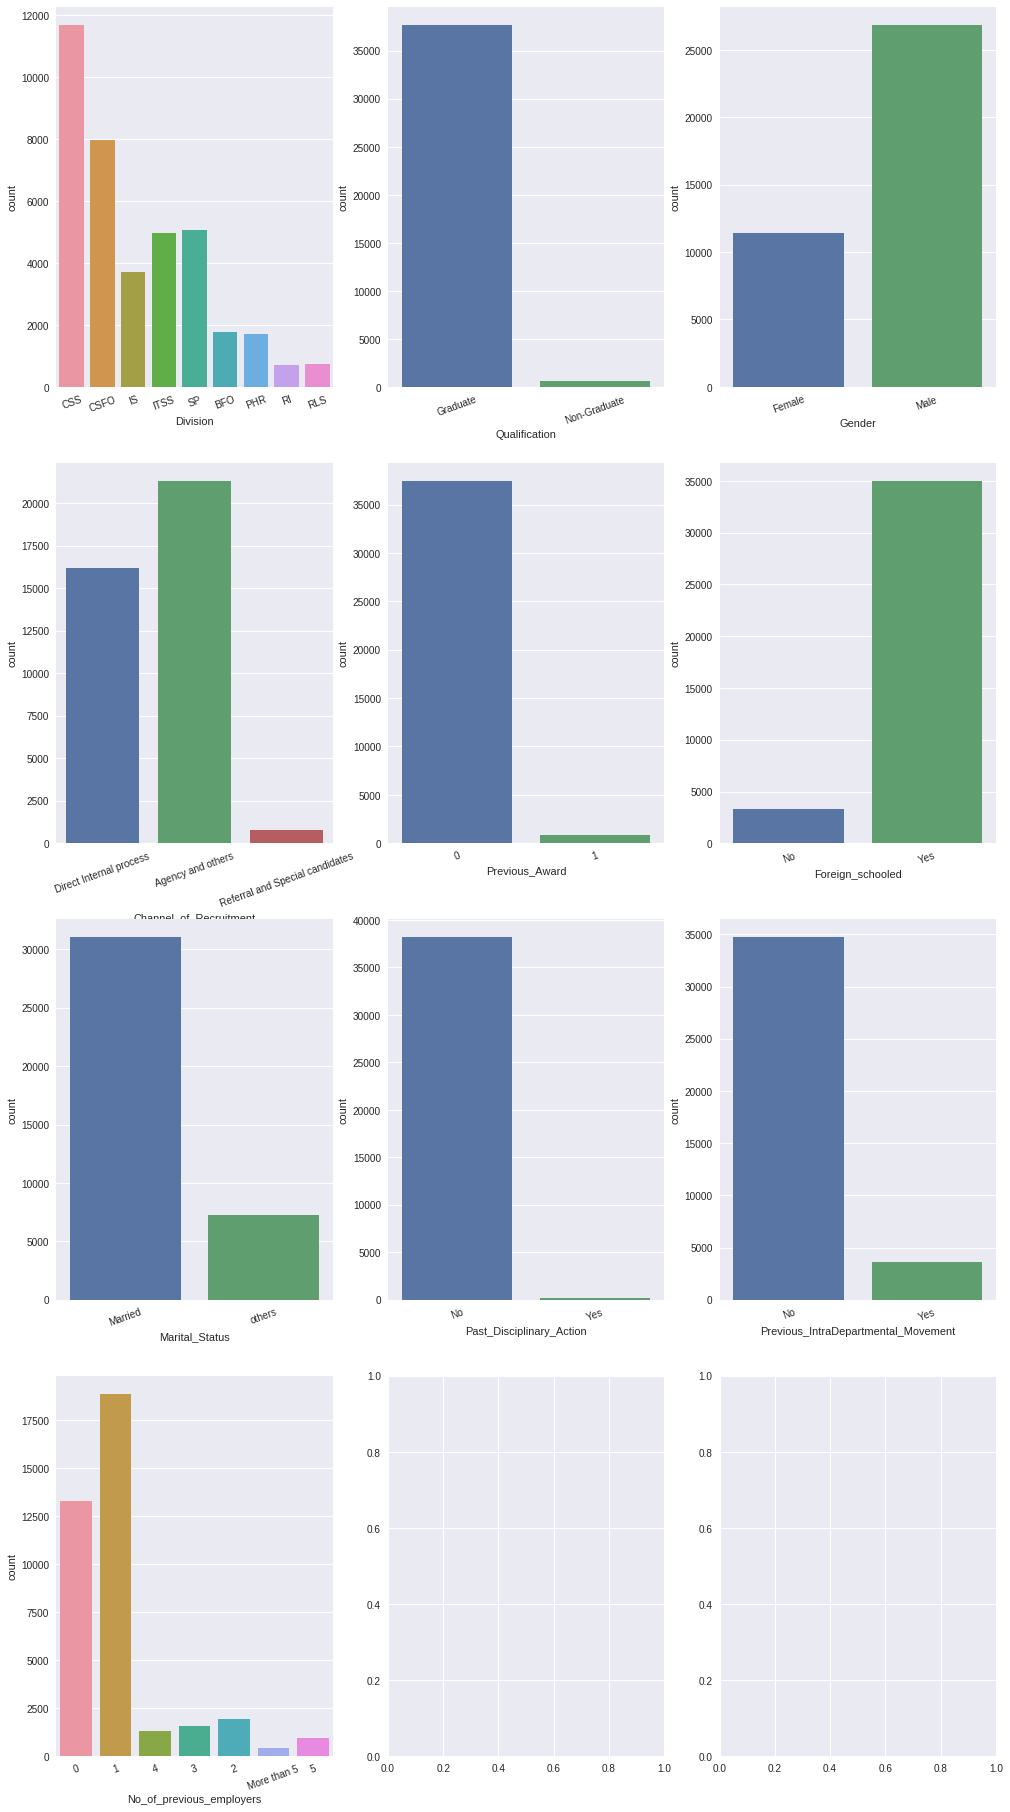

In [32]:
fig, ax = plt.subplots(4, 3, figsize=(15, 30))
for variable, subplot in zip(cat_cols_low_card, ax.flatten()):
    sns.countplot(df_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(20)

# Relationship between the categorical features and the target variable


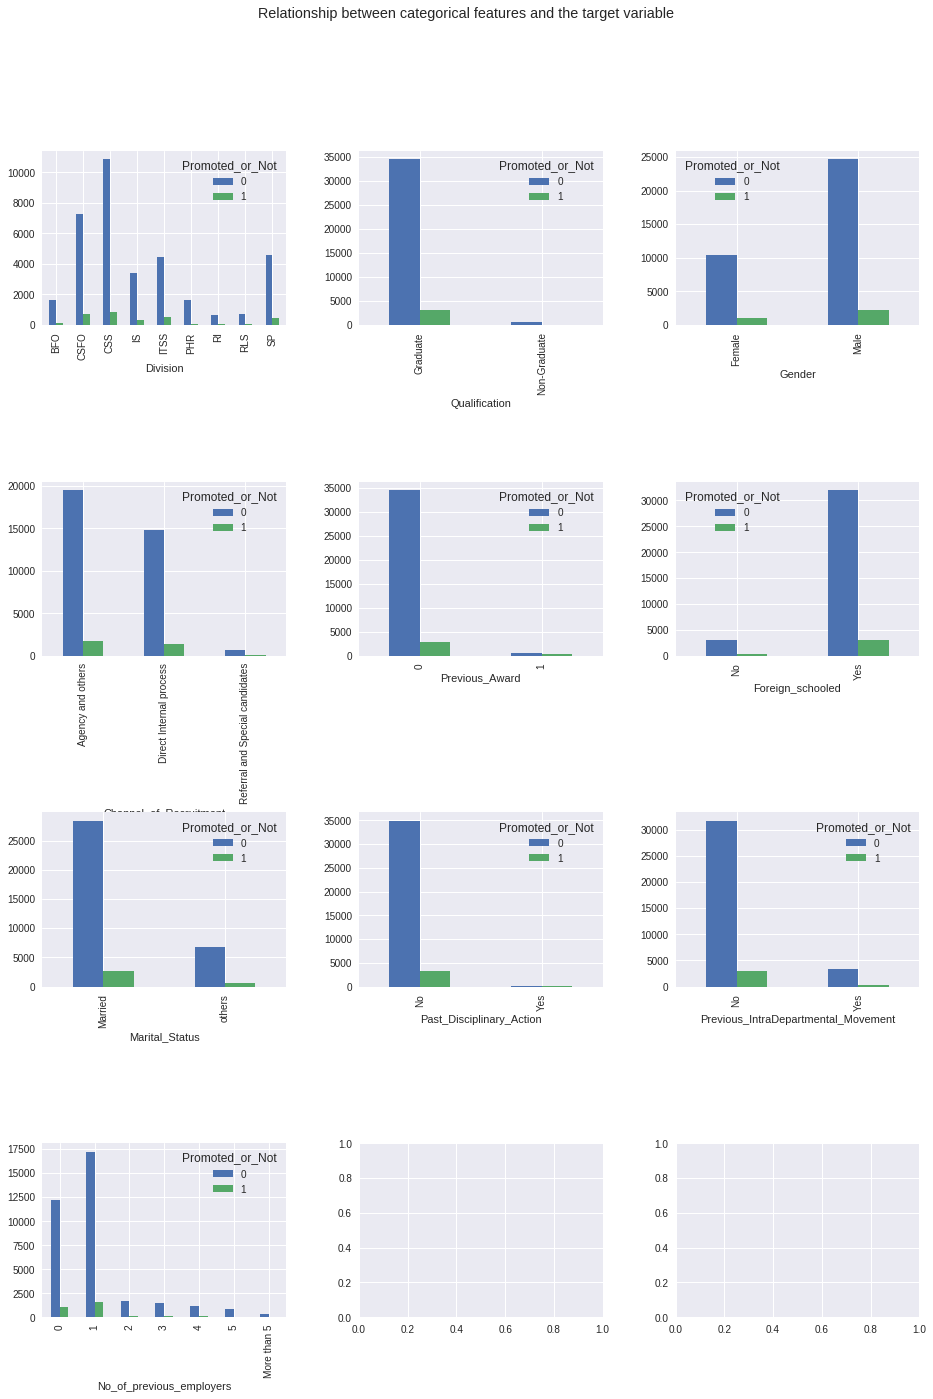

In [33]:
#Relationship between the categoric features and the target variable
fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (14,20))
fig.suptitle('Relationship between categorical features and the target variable')
fig.subplots_adjust(hspace = 0.9, wspace = 0.3)
for ax, col in zip(axes.flatten(), cat_cols_low_card) :
    pd.crosstab(df_train[col], df_train['Promoted_or_Not']).plot(kind='bar', ax = ax)
    for label in subplot.get_xticklabels():
        label.set_rotation(20)
    ax.set_xlabel(col)  

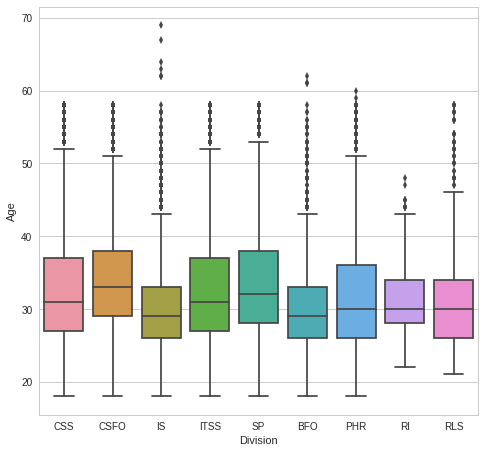

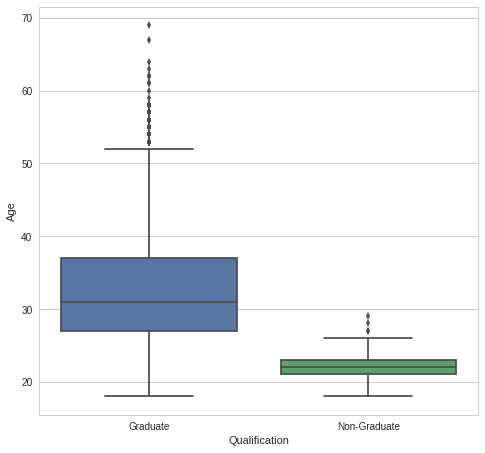

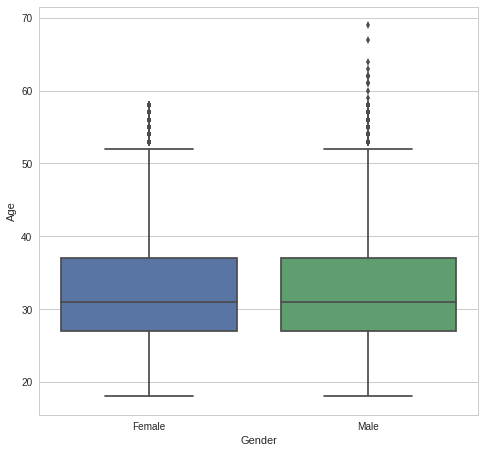

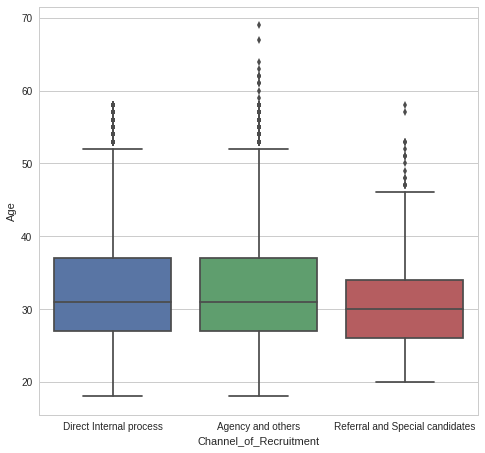

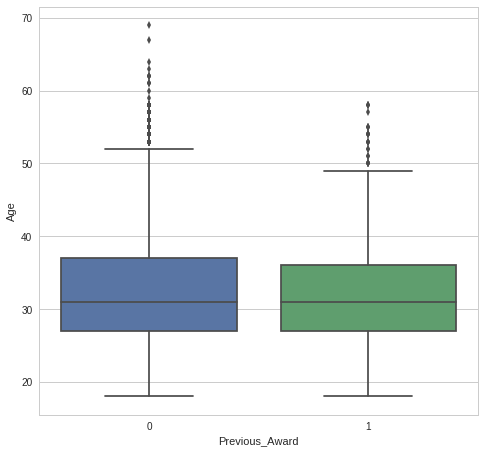

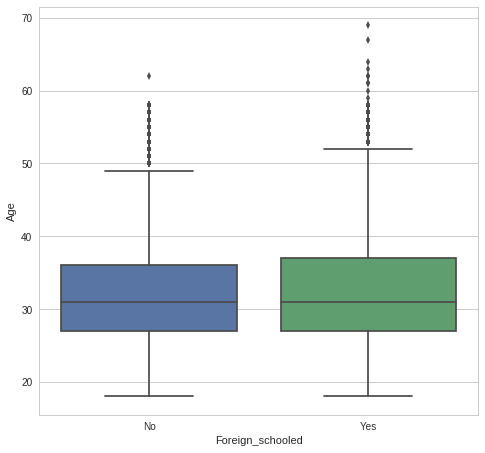

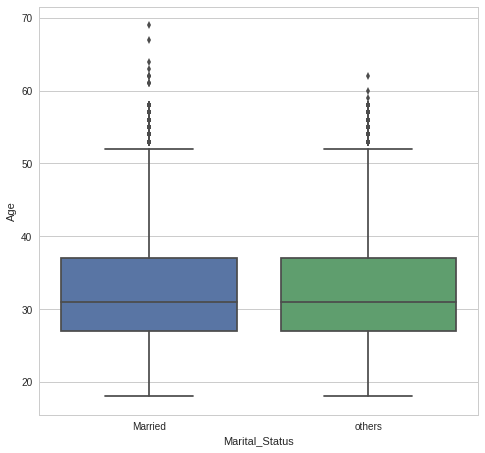

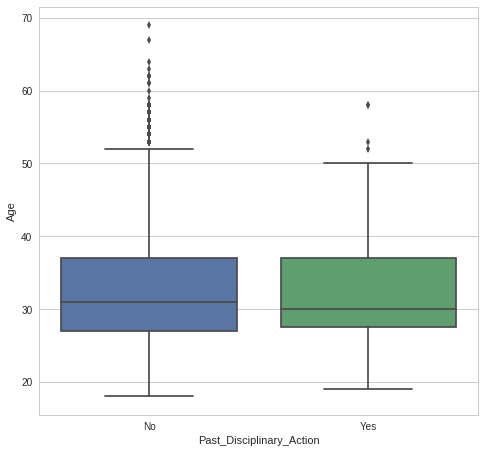

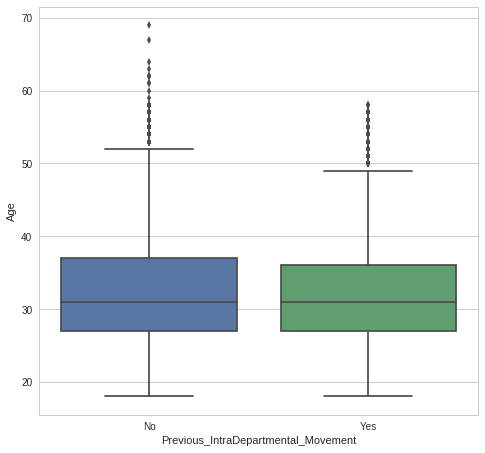

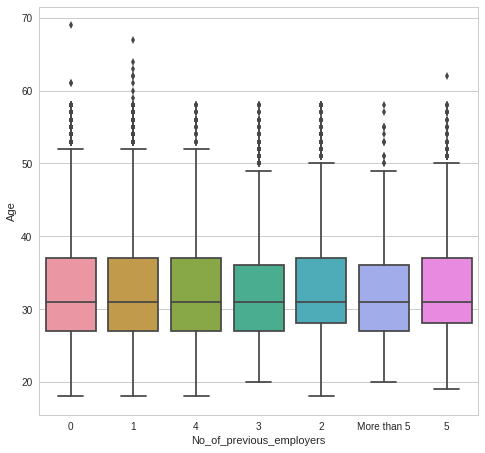

In [34]:
## relationship between the numeric feature(Age) and the categorical features except state_of_origin
def plot_box(df_train, cols, col_y = 'Age'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df_train)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
plot_box(df_train, cat_cols_low_card)    

Relationship between Categorical feature (state of origin) and Numerical features (Age and Working years)

In [35]:
for variable in ['Division','State_Of_Origin']:
    mappings = find_category_mean(df_train, variable, 'Promoted_or_Not')
    integer_encode_mean(df_train, df_test, variable, mappings)

In [36]:
df_train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,...,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age,year_of_experience,overall_performance,Geopolitical_zone
0,YAK/S/00001,0.071911,Graduate,Female,Direct Internal process,2,1986,12.5,2011,1,...,No,Married,No,No,0,0,33,8,82,South_East
1,YAK/S/00002,0.088298,Graduate,Male,Agency and others,2,1991,12.5,2015,0,...,Yes,Married,No,No,0,0,28,4,104,South_East
2,YAK/S/00003,0.071911,Graduate,Male,Direct Internal process,2,1987,7.5,2012,0,...,Yes,Married,No,No,0,0,32,7,84,North_West
3,YAK/S/00004,0.071911,Graduate,Male,Agency and others,3,1982,2.5,2009,0,...,Yes,others,No,No,1,0,37,10,126,North_Central
4,YAK/S/00006,0.093523,Graduate,Male,Direct Internal process,3,1990,7.5,2012,0,...,Yes,Married,No,No,1,0,29,7,231,South_South


In [37]:
df_train.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not', 'Age', 'year_of_experience', 'overall_performance',
       'Geopolitical_zone'],
      dtype='object')

In [38]:
train_cols = ['Division', 'Qualification', 'Gender',
               'Channel_of_Recruitment', 'Trainings_Attended',
               'Last_performance_score', 'Targets_met',
               'Previous_Award', 'Training_score_average', 'State_Of_Origin',
               'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
               'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
               'Promoted_or_Not', 'Age', 'year_of_experience', 'overall_performance']
test_cols = ['Division', 'Qualification', 'Gender',
               'Channel_of_Recruitment', 'Trainings_Attended',
               'Last_performance_score', 'Targets_met',
               'Previous_Award', 'Training_score_average', 'State_Of_Origin',
               'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
               'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
                'Age', 'year_of_experience', 'overall_performance']
train_data = df_train[train_cols]
test_data = df_test[test_cols]

In [39]:
train_data.head()

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age,year_of_experience,overall_performance
0,0.071911,Graduate,Female,Direct Internal process,2,12.5,1,0,41,0.095906,No,Married,No,No,0,0,33,8,82
1,0.088298,Graduate,Male,Agency and others,2,12.5,0,0,52,0.095906,Yes,Married,No,No,0,0,28,4,104
2,0.071911,Graduate,Male,Direct Internal process,2,7.5,0,0,42,0.078049,Yes,Married,No,No,0,0,32,7,84
3,0.071911,Graduate,Male,Agency and others,3,2.5,0,0,42,0.071179,Yes,others,No,No,1,0,37,10,126
4,0.093523,Graduate,Male,Direct Internal process,3,7.5,0,0,77,0.084695,Yes,Married,No,No,1,0,29,7,231


In [40]:
print('shape of train data:',train_data.shape)
print('shape of test data:',test_data.shape)

shape of train data: (38312, 19)
shape of test data: (16496, 18)


In [41]:
train_data.columns

Index(['Division', 'Qualification', 'Gender', 'Channel_of_Recruitment',
       'Trainings_Attended', 'Last_performance_score', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not', 'Age', 'year_of_experience', 'overall_performance'],
      dtype='object')

In [42]:
## dummify the categorical features
cols = ['Qualification', 'Gender', 'Channel_of_Recruitment',
       'Targets_met',
       'Previous_Award', 'Foreign_schooled',
       'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers']
train = pd.get_dummies(train_data, columns =cols, prefix_sep='__', drop_first=True)  # the seperator between the prefix (column name) and cell value
test = pd.get_dummies(test_data, columns =cols, prefix_sep='__', drop_first=True)  # the seperator between the prefix (column name) and cell value

In [43]:
#recheck the correlation between the features and the target variable
train.corr()['Promoted_or_Not']

Division                                                   0.051619
Trainings_Attended                                        -0.024345
Last_performance_score                                     0.119690
Training_score_average                                     0.178448
State_Of_Origin                                            0.031455
Promoted_or_Not                                            1.000000
Age                                                       -0.017991
year_of_experience                                        -0.012287
overall_performance                                        0.096033
Qualification__Non-Graduate                                0.001855
Gender__Male                                              -0.010437
Channel_of_Recruitment__Direct Internal process           -0.004354
Channel_of_Recruitment__Referral and Special candidates    0.019354
Targets_met__1                                             0.224518
Previous_Award__1                               

In [44]:
train.columns

Index(['Division', 'Trainings_Attended', 'Last_performance_score',
       'Training_score_average', 'State_Of_Origin', 'Promoted_or_Not', 'Age',
       'year_of_experience', 'overall_performance',
       'Qualification__Non-Graduate', 'Gender__Male',
       'Channel_of_Recruitment__Direct Internal process',
       'Channel_of_Recruitment__Referral and Special candidates',
       'Targets_met__1', 'Previous_Award__1', 'Foreign_schooled__Yes',
       'Marital_Status__others', 'Past_Disciplinary_Action__Yes',
       'Previous_IntraDepartmental_Movement__Yes',
       'No_of_previous_employers__1', 'No_of_previous_employers__2',
       'No_of_previous_employers__3', 'No_of_previous_employers__4',
       'No_of_previous_employers__5', 'No_of_previous_employers__More than 5'],
      dtype='object')

In [47]:
features = ['Division', 'Trainings_Attended', 'Last_performance_score',
       'Training_score_average', 'State_Of_Origin', 'Age',
       'year_of_experience', 'overall_performance',
       'Qualification__Non-Graduate', 'Gender__Male',
       'Channel_of_Recruitment__Direct Internal process',
       'Channel_of_Recruitment__Referral and Special candidates',
       'Targets_met__1', 'Previous_Award__1', 'Foreign_schooled__Yes',
       'Marital_Status__others', 'Past_Disciplinary_Action__Yes',
       'Previous_IntraDepartmental_Movement__Yes',
       'No_of_previous_employers__1', 'No_of_previous_employers__2',
       'No_of_previous_employers__3', 'No_of_previous_employers__4',
       'No_of_previous_employers__5', 'No_of_previous_employers__More than 5']

In [48]:
predicted_class_name = ['Promoted_or_Not']
X = train[features].values
y = train[predicted_class_name].values

# Machine Learning

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import sklearn.metrics as sklm
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [50]:
split_test_size = 0.30
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=split_test_size, random_state=42)

In [51]:
print("{0:0.2f}% in training set".format((len(X_train)/len(train.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(train.index)) * 100))

70.00% in training set
30.00% in test set


In [52]:
colu = ['Division', 'Trainings_Attended', 'Last_performance_score',
       'Training_score_average', 'State_Of_Origin', 'Age',
       'year_of_experience', 'overall_performance',
       'Qualification__Non-Graduate', 'Gender__Male',
       'Channel_of_Recruitment__Direct Internal process',
       'Channel_of_Recruitment__Referral and Special candidates',
       'Targets_met__1', 'Previous_Award__1', 'Foreign_schooled__Yes',
       'Marital_Status__others', 'Past_Disciplinary_Action__Yes',
       'Previous_IntraDepartmental_Movement__Yes',
       'No_of_previous_employers__1', 'No_of_previous_employers__2',
       'No_of_previous_employers__3', 'No_of_previous_employers__4',
       'No_of_previous_employers__5', 'No_of_previous_employers__More than 5']
test1=test[colu]

In [53]:
print(X_train.shape)
print(test1.shape)

(26818, 24)
(16496, 24)


In [54]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
test1=ss.transform(test1)

In [55]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [56]:
xgb = xgb.XGBClassifier(learning_rate=0.015, max_depth=9, n_estimators=500, n_jobs=2)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.015, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=2,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [57]:
probabilities = xgb.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10487                32
Actual negative       659               316

Accuracy        0.94
AUC             0.90
Macro precision 0.92
Macro recall    0.66
 
           Positive      Negative
Num case    10519           975
Precision    0.94          0.91
Recall       1.00          0.32
F1           0.97          0.48


In [58]:
solution=xgb.predict(test1)
my_submission=pd.DataFrame({'EmployeeNo':df_test.EmployeeNo,'Promoted_or_Not': solution})
my_submission.to_csv('XgboostClassifierDSN_staff_algorithmic_promotion_prediction.csv', index=False)